<a href="https://colab.research.google.com/github/shakya1527/Placement-Prediction/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/StudentInfo1.csv')

In [ ]:
df

,Your Name,Roll Number,Email ID,Course,Semester,S.G.P.A,Backlog,Backlog Subject,Score
0,Piyush Khandelia,BCA/40541/20,piyushkhandelia2002@gmail.com,BCA,6,8.70,No,NaN,86
1,Kumari priya,BCA/40018/20,kp6273275@gmail.com,BCA,6,7.91,No,Null,40
2,Raunak kumar,BCA/40545/20,ujjwalmishra916@gmail.com,BCA,6,7.92,No,0,90
3,Komal Kumari,BCA/40016/20,kchoubey905@gmail.com,BCA,6th,8.80,No,NaN,98
4,Swati kumari,BCA/40008/20,kumariswati7321@gmail.com,BCA,6th,6.08,No,Clear,64
...,...,...,...,...,...,...,...,...,...
84,Ankur Aayush,BCA/40517/20,bca40517.20@bitmesra.ac.in,BCA,6th,7.63,No,Null,32
85,Aman kumar,BCA/40522/20,bca40522.20@bitmesra.ac.in,BCA,6th,8.10,No,Null,62
86,Kumar Anshuman,BCA/40516/20,bca40516.20@bitmesra.ac.in,BCA,6th,8.64,No,Null,52
87,Sanjeev Kumar Sharma,BCA/40566/20,bca40566.20@bitmesra.ac.in,BCA,6th,7.83,No,Null,40


In [ ]:
x = df[['S.G.P.A','Score']]
x

,S.G.P.A,Score
0,8.70,86
1,7.91,40
2,7.92,90
3,8.80,98
4,6.08,64
...,...,...
84,7.63,32
85,8.10,62
86,8.64,52
87,7.83,40


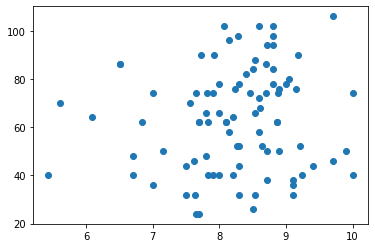

In [ ]:
plt.scatter(df['S.G.P.A'],df['Score'])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()
scaledx = scale.fit_transform(x)
scaledx[:5]

array([[ 0.53057274,  1.08048825],
       [-0.36168896, -1.09216347],
       [-0.35039451,  1.26941449],
       [ 0.64351726,  1.64726696],
       [-2.42857366,  0.04139395]])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit_predict(scaledx)
  wcss.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [ ]:
wcss

[178.0,
 112.48128577864881,
 70.58356846654256,
 52.6500173478157,
 39.715837084621896,
 33.380426697827446,
 28.858882187229327,
 24.82548426103678,
 22.457081667438466,
 20.039708388886496]

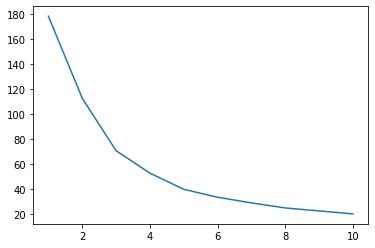

In [ ]:
plt.plot(range(1,11),wcss)

In [ ]:

km = KMeans(n_clusters=4)
y_means = km.fit_predict(scaledx)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_means

array([2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 3, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 2, 3, 2, 2, 3, 2, 0, 2, 0, 3, 2, 3, 2, 2, 3, 1, 2, 3,
       0, 2, 2, 2, 2, 3, 0, 2, 1, 3, 0, 0, 1, 0, 1, 2, 1, 0, 2, 0, 3, 1,
       0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 1, 3, 0, 0, 3, 1, 2, 2, 0, 0, 3, 0,
       0], dtype=int32)

In [ ]:
y[y_means == 0,0]

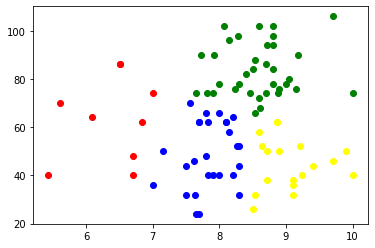

In [ ]:
plt.scatter(y[y_means == 0,0],y[y_means == 0,1],color='blue')
plt.scatter(y[y_means == 1,0],y[y_means == 1,1],color='red')
plt.scatter(y[y_means == 2,0],y[y_means == 2,1],color='green')
plt.scatter(y[y_means == 3,0],y[y_means == 3,1],color='yellow')